In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
df = pd.read_csv("wine-reviews.csv")

FileNotFoundError: ignored

In [ ]:
df = pd.read_csv("wine-reviews.csv", usecols = ['country', 'description', 'points', 'price', 'variety', 'winery'])

In [ ]:
df

,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,90,28.0,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,90,75.0,Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,90,30.0,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",90,32.0,Pinot Gris,Domaine Marcel Deiss


In [ ]:
df.head()

,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks


In [ ]:
df = df.dropna(subset=['description', 'points'])

In [ ]:
df.head()

,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks


(array([  397.,   692.,  1836.,  3025.,  6480.,  9530., 12600., 16933.,
        17207., 12226., 15410., 11359.,  9613.,  6489.,  3758.,  1535.,
          523.,   229.,    77.,    52.]),
 array([ 80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,
         91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100.]),
 <a list of 20 Patch objects>)

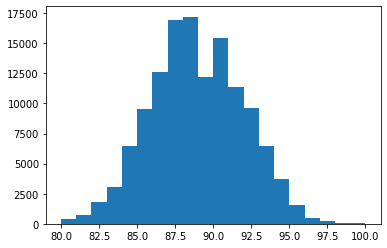

In [ ]:
plt.hist(df.points, bins=20)

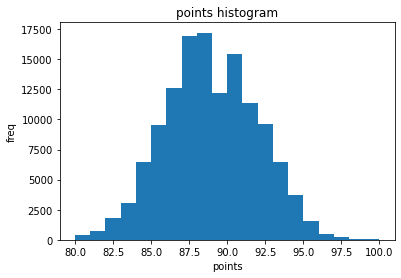

In [ ]:
plt.hist(df.points, bins=20)
plt.title("points histogram")
plt.xlabel("points")
plt.ylabel("freq")
plt.show()

In [ ]:
df

,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,90,28.0,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,90,75.0,Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,90,30.0,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",90,32.0,Pinot Gris,Domaine Marcel Deiss


In [ ]:
df["label"] = (df.points >= 90).astype(int)
df = df[['description', 'points', 'label']]

In [ ]:
train, val, test = np.split(df.sample(frac=1), [int(0.8*len(df)), int(0.9*len(df))])

In [ ]:
len(train), len(val), len(test)

(103976, 12997, 12998)

In [ ]:
def df_to_dataset(dataframe, shuffle=True, batch_size=1024):
  df = dataframe.copy()
  labels = df.pop('label')
  df = df["description"]
  ds = tf.data.Dataset.from_tensor_slices((df, labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(tf.data.AUTOTUNE)
  return ds

In [ ]:
train_data = df_to_dataset(train)
val_data = df_to_dataset(val)
test_data = df_to_dataset(test)

In [ ]:
train_data

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
list(train_data)[0]

(<tf.Tensor: shape=(1024,), dtype=string, numpy=
 array([b'Aromas of red berry, grilled herb, oak-driven spice and a balsamic note lead the nose on this. The palate is still tight and closed but eventually gives up raw cherry, strawberry, sage and espresso alongside assertive, raspy tannins. Let the tannins soften a bit and then drink up before the fruit fades.',
        b"Spicy, peppery, charred oak aromas meet rich blackberry and boysenberry flavors in this expressive, full-bodied and dry wine. It's rather heavy on the oak, which serves to add complexity and firm tannin, keeping it well-structured through the spicy finish.",
        b'Hailing from Sagemoor, Oasis and Canyon Vineyard Ranch, this wine has aromas of toasty spices, peach, butter and corn on the cob. The flavors are lighter in style with a creamy feel and a pleasing sense of balance.',
        ...,
        b'This is a pretty lean, tightly focused wine. Grilled pineapple and citrus notes broaden slightly on the midpalate, 

# Embedding + Model

In [ ]:
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(embedding, dtype=tf.string, trainable = True)

In [ ]:
hub_layer

In [ ]:
hub_layer(list(train_data)[0][0])

<tf.Tensor: shape=(1024, 50), dtype=float32, numpy=
array([[ 0.41229928,  0.0301323 ,  0.12677939, ..., -0.11815843,
        -0.1231859 ,  0.16973855],
       [ 0.28398693,  0.05186639,  0.02954068, ..., -0.18613368,
         0.02229012,  0.08376524],
       [ 0.366401  , -0.47516423,  0.00727507, ...,  0.06066707,
        -0.10309123,  0.12192696],
       ...,
       [ 0.3660198 , -0.01645366,  0.21929787, ..., -0.05410339,
        -0.19111142,  0.0133747 ],
       [ 0.50121677, -0.09535908,  0.07804301, ...,  0.03602307,
        -0.38902277,  0.18313351],
       [ 0.35848424, -0.1084555 ,  0.13731325, ..., -0.09227701,
        -0.1755678 ,  0.15873745]], dtype=float32)>

In [ ]:
hub_layer(list(train_data)[0][0])

<tf.Tensor: shape=(1024, 50), dtype=float32, numpy=
array([[ 0.24812606, -0.04551659,  0.2532535 , ..., -0.014007  ,
        -0.07936076,  0.00550498],
       [ 0.33837315, -0.21130364, -0.10428248, ..., -0.13725485,
        -0.23463827,  0.13481867],
       [ 0.32880688, -0.18903023,  0.0870757 , ..., -0.18917944,
        -0.35073122,  0.059363  ],
       ...,
       [ 0.40401924, -0.28822848, -0.2203522 , ..., -0.11841004,
        -0.04133622,  0.08392511],
       [ 0.59884256, -0.02762476,  0.280159  , ...,  0.06200656,
        -0.24417214, -0.0185353 ],
       [ 0.12011891, -0.21443652, -0.29394677, ...,  0.13582857,
        -0.26950434, -0.00372963]], dtype=float32)>

In [ ]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(16, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = ['Accuracy'])

In [ ]:
model.evaluate(train_data)

102/102 [==============================] - 2s 13ms/step - loss: 0.6908 - Accuracy: 0.5434


[0.6907806396484375, 0.5433850288391113]

In [ ]:
model.evaluate(val_data)

13/13 [==============================] - 0s 16ms/step - loss: 0.6912 - Accuracy: 0.5367


[0.6912341117858887, 0.5366622805595398]

In [ ]:
history = model.fit(train_data, epochs=5, validation_data = val_data)

Epoch 1/5
102/102 [==============================] - 65s 603ms/step - loss: 0.6287 - Accuracy: 0.6290 - val_loss: 0.5211 - val_Accuracy: 0.7609
Epoch 2/5
102/102 [==============================] - 55s 537ms/step - loss: 0.4782 - Accuracy: 0.7752 - val_loss: 0.4044 - val_Accuracy: 0.8180
Epoch 3/5
102/102 [==============================] - 56s 546ms/step - loss: 0.4063 - Accuracy: 0.8244 - val_loss: 0.3802 - val_Accuracy: 0.8274
Epoch 4/5
102/102 [==============================] - 57s 560ms/step - loss: 0.3683 - Accuracy: 0.8453 - val_loss: 0.3724 - val_Accuracy: 0.8262
Epoch 5/5
102/102 [==============================] - 55s 536ms/step - loss: 0.3435 - Accuracy: 0.8574 - val_loss: 0.3732 - val_Accuracy: 0.8299


In [ ]:
history

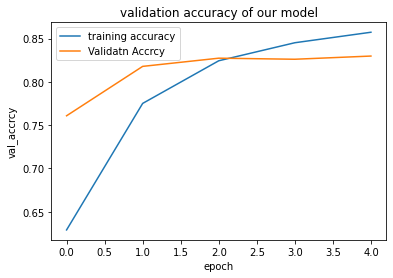

In [ ]:
plt.plot(history.history['Accuracy'], label = "training accuracy")
plt.plot(history.history['val_Accuracy'], label="Validatn Accrcy")
plt.title("validation accuracy of our model")
plt.ylabel("val_accrcy")
plt.xlabel("epoch")
plt.legend()
plt.show()

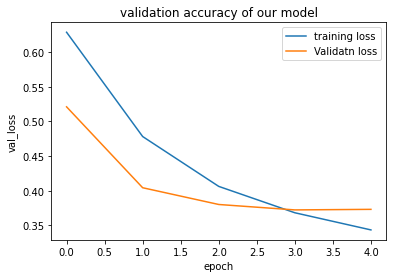

In [ ]:
plt.plot(history.history['loss'], label = "training loss")
plt.plot(history.history['val_loss'], label="Validatn loss")
plt.title("validation accuracy of our model")
plt.ylabel("val_loss")
plt.xlabel("epoch")
plt.legend()
plt.show()

So we add dropout layers!!!! 
and eval and fit again:
now check.........

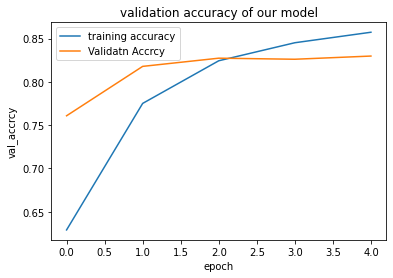

In [ ]:
plt.plot(history.history['Accuracy'], label = "training accuracy")
plt.plot(history.history['val_Accuracy'], label="Validatn Accrcy")
plt.title("validation accuracy of our model")
plt.ylabel("val_accrcy")
plt.xlabel("epoch")
plt.legend()
plt.show()

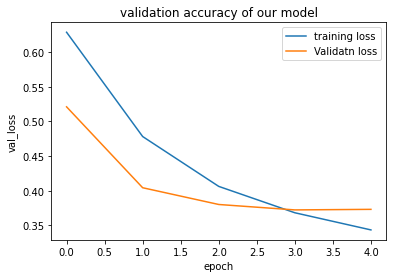

In [ ]:
plt.plot(history.history['loss'], label = "training loss")
plt.plot(history.history['val_loss'], label="Validatn loss")
plt.title("validation accuracy of our model")
plt.ylabel("val_loss")
plt.xlabel("epoch")
plt.legend()
plt.show()

In [ ]:
model.evaluate(test_data)

13/13 [==============================] - 1s 85ms/step - loss: 0.3804 - Accuracy: 0.8281


[0.38040122389793396, 0.828127384185791]

#LSTM

In [ ]:
encoder = tf.keras.layers.TextVectorization(max_tokens=2000)
encoder.adapt(train_data.map(lambda text, label: text))

In [ ]:
vocab = np.array(encoder.get_vocabulary())

In [ ]:
vocab[:30]

array(['', '[UNK]', 'and', 'the', 'a', 'of', 'with', 'this', 'is', 'wine',
       'flavors', 'in', 'it', 'to', 'its', 'on', 'fruit', 'aromas',
       'palate', 'that', 'acidity', 'finish', 'from', 'but', 'tannins',
       'drink', 'cherry', 'ripe', 'are', 'black'], dtype='<U17')

In [ ]:
# model = tf.keras.Sequential([
#     # encoder will vectorize the text!!
#     encoder,
#     # and then we need some embedding for this vectorized text
#     tf.keras.layers.Embedding(
#         input_dim = len(encoder.get_vocabulary()),
#         output_dim = 32,
#         mask_zero = True
#     ),
#     # therefore, the above two will turn our sentance into a vector of numbers that our NN will handle
#     tf.keras.layers.LSTM(32),
#     tf.keras.layers.Dense(16, activation='relu'),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(16, activation='sigmoid'),
# ])

In [ ]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=32,
        mask_zero=True
    ),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.evaluate(train_data)
model.evaluate(val_data)

13/13 [==============================] - 2s 185ms/step - loss: 0.6926 - accuracy: 0.5926


[0.6925625205039978, 0.5925983190536499]

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, None)             0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, None, 32)          64000     
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                      

In [ ]:
history = model.fit(train_data, epochs = 5, validation_data=val_data)

Epoch 1/5
102/102 [==============================] - 99s 874ms/step - loss: 0.5326 - accuracy: 0.7236 - val_loss: 0.3681 - val_accuracy: 0.8332
Epoch 2/5
102/102 [==============================] - 57s 559ms/step - loss: 0.3675 - accuracy: 0.8360 - val_loss: 0.3483 - val_accuracy: 0.8415
Epoch 3/5
102/102 [==============================] - 55s 541ms/step - loss: 0.3500 - accuracy: 0.8428 - val_loss: 0.3441 - val_accuracy: 0.8431
Epoch 4/5
102/102 [==============================] - 53s 520ms/step - loss: 0.3431 - accuracy: 0.8466 - val_loss: 0.3444 - val_accuracy: 0.8419
Epoch 5/5
102/102 [==============================] - 53s 518ms/step - loss: 0.3393 - accuracy: 0.8487 - val_loss: 0.3418 - val_accuracy: 0.8432


In [ ]:
model.evaluate(test_data)

13/13 [==============================] - 5s 364ms/step - loss: 0.3489 - accuracy: 0.8412


[0.3488729000091553, 0.8412063121795654]